In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
data = {
    'Month':['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'],
    'Sales':[200,300,350, 310, 250, 180, 190, 168, 200, 310, 350, 310, 250, 300, 330, 290, 230, 190]
}
df = pd.DataFrame(data)
df

,Month,Sales
0,1,200
1,2,300
2,3,350
3,4,310
4,5,250
5,6,180
6,7,190
7,8,168
8,9,200
9,10,310


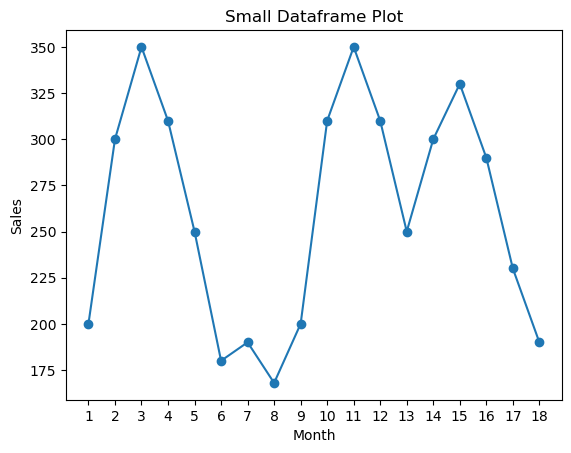

In [42]:
plt.plot(df['Month'], df['Sales'], marker='o')
plt.title('Small Dataframe Plot')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [43]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [44]:
WINDOW_SIZE = 5
X, y = df_to_X_y(df['Sales'], WINDOW_SIZE)
X.shape, y.shape

((13, 5, 1), (13,))

In [48]:
X_train, y_train = X[:9], y[:9]
X_val, y_val = X[9:11], y[9:11]
X_test, y_test = X[11:], y[11:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((9, 5, 1), (9,), (2, 5, 1), (2,), (2, 5, 1), (2,))

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((5,1)))
model.add(LSTM(64, 'sigmoid'))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_5 (Dense)             (None, 8)                 520       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
cp = ModelCheckpoint('Practice Prediction Model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics = [RootMeanSquaredError()])

In [66]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 13097.2686 - root_mean_squared_error: 114.4433INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 30s 30s/step - loss: 13097.2686 - root_mean_squared_error: 114.4433 - val_loss: 23942.7480 - val_root_mean_squared_error: 154.7344
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 13054.6445 - root_mean_squared_error: 114.2569INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 13054.6445 - root_mean_squared_error: 114.2569 - val_loss: 23873.5273 - val_root_mean_squared_error: 154.5106
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 13012.0967 - root_mean_squared_error: 114.0706INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 13012.0967 - root_mean_squared_error: 114.0706 - val_loss: 23804.3633 - val_root_mean_squared_error: 154.2866
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 12969.6143 - root_mean_squared_error: 113.8842INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 12s 12s/step - loss: 12969.6143 - root_mean_squared_error: 113.8842 - val_loss: 23735.2520 - val_root_mean_squared_error: 154.0625
Epoch 5/100
1/1 [==============================] - ETA: 0s - loss: 12927.2070 - root_mean_squared_error: 113.6979INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 12927.2070 - root_mean_squared_error: 113.6979 - val_loss: 23666.2246 - val_root_mean_squared_error: 153.8383
Epoch 6/100
1/1 [==============================] - ETA: 0s - loss: 12884.8799 - root_mean_squared_error: 113.5116INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 13s 13s/step - loss: 12884.8799 - root_mean_squared_error: 113.5116 - val_loss: 23597.2461 - val_root_mean_squared_error: 153.6140
Epoch 7/100
1/1 [==============================] - ETA: 0s - loss: 12842.6201 - root_mean_squared_error: 113.3253INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 10s 10s/step - loss: 12842.6201 - root_mean_squared_error: 113.3253 - val_loss: 23528.3457 - val_root_mean_squared_error: 153.3895
Epoch 8/100
1/1 [==============================] - ETA: 0s - loss: 12800.4365 - root_mean_squared_error: 113.1390INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 16s 16s/step - loss: 12800.4365 - root_mean_squared_error: 113.1390 - val_loss: 23459.5078 - val_root_mean_squared_error: 153.1650
Epoch 9/100
1/1 [==============================] - ETA: 0s - loss: 12758.3232 - root_mean_squared_error: 112.9528INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 9s 9s/step - loss: 12758.3232 - root_mean_squared_error: 112.9528 - val_loss: 23390.7422 - val_root_mean_squared_error: 152.9403
Epoch 10/100
1/1 [==============================] - ETA: 0s - loss: 12716.2832 - root_mean_squared_error: 112.7665INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 15s 15s/step - loss: 12716.2832 - root_mean_squared_error: 112.7665 - val_loss: 23322.0645 - val_root_mean_squared_error: 152.7156
Epoch 11/100
1/1 [==============================] - ETA: 0s - loss: 12674.3203 - root_mean_squared_error: 112.5803INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 11s 11s/step - loss: 12674.3203 - root_mean_squared_error: 112.5803 - val_loss: 23253.4492 - val_root_mean_squared_error: 152.4908
Epoch 12/100
1/1 [==============================] - ETA: 0s - loss: 12632.4189 - root_mean_squared_error: 112.3940INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 9s 9s/step - loss: 12632.4189 - root_mean_squared_error: 112.3940 - val_loss: 23184.9219 - val_root_mean_squared_error: 152.2660
Epoch 13/100
1/1 [==============================] - ETA: 0s - loss: 12590.5938 - root_mean_squared_error: 112.2078INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 12590.5938 - root_mean_squared_error: 112.2078 - val_loss: 23116.4883 - val_root_mean_squared_error: 152.0411
Epoch 14/100
1/1 [==============================] - ETA: 0s - loss: 12548.8408 - root_mean_squared_error: 112.0216INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 12548.8408 - root_mean_squared_error: 112.0216 - val_loss: 23048.1133 - val_root_mean_squared_error: 151.8161
Epoch 15/100
1/1 [==============================] - ETA: 0s - loss: 12507.1367 - root_mean_squared_error: 111.8353INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 11s 11s/step - loss: 12507.1367 - root_mean_squared_error: 111.8353 - val_loss: 22979.8379 - val_root_mean_squared_error: 151.5910
Epoch 16/100
1/1 [==============================] - ETA: 0s - loss: 12465.5020 - root_mean_squared_error: 111.6490INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 12465.5020 - root_mean_squared_error: 111.6490 - val_loss: 22911.6523 - val_root_mean_squared_error: 151.3660
Epoch 17/100
1/1 [==============================] - ETA: 0s - loss: 12423.9258 - root_mean_squared_error: 111.4627INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 12423.9258 - root_mean_squared_error: 111.4627 - val_loss: 22843.5430 - val_root_mean_squared_error: 151.1408
Epoch 18/100
1/1 [==============================] - ETA: 0s - loss: 12382.3945 - root_mean_squared_error: 111.2762INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 12382.3945 - root_mean_squared_error: 111.2762 - val_loss: 22775.5430 - val_root_mean_squared_error: 150.9157
Epoch 19/100
1/1 [==============================] - ETA: 0s - loss: 12340.9219 - root_mean_squared_error: 111.0897INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 13s 13s/step - loss: 12340.9219 - root_mean_squared_error: 111.0897 - val_loss: 22707.6211 - val_root_mean_squared_error: 150.6905
Epoch 20/100
1/1 [==============================] - ETA: 0s - loss: 12299.4883 - root_mean_squared_error: 110.9031INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 20s 20s/step - loss: 12299.4883 - root_mean_squared_error: 110.9031 - val_loss: 22639.7949 - val_root_mean_squared_error: 150.4653
Epoch 21/100
1/1 [==============================] - ETA: 0s - loss: 12258.0977 - root_mean_squared_error: 110.7163INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 14s 14s/step - loss: 12258.0977 - root_mean_squared_error: 110.7163 - val_loss: 22572.0684 - val_root_mean_squared_error: 150.2400
Epoch 22/100
1/1 [==============================] - ETA: 0s - loss: 12216.7432 - root_mean_squared_error: 110.5294INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 16s 16s/step - loss: 12216.7432 - root_mean_squared_error: 110.5294 - val_loss: 22504.4258 - val_root_mean_squared_error: 150.0148
Epoch 23/100
1/1 [==============================] - ETA: 0s - loss: 12175.4238 - root_mean_squared_error: 110.3423INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 31s 31s/step - loss: 12175.4238 - root_mean_squared_error: 110.3423 - val_loss: 22436.8672 - val_root_mean_squared_error: 149.7894
Epoch 24/100
1/1 [==============================] - ETA: 0s - loss: 12134.1328 - root_mean_squared_error: 110.1550INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 198s 198s/step - loss: 12134.1328 - root_mean_squared_error: 110.1550 - val_loss: 22369.4023 - val_root_mean_squared_error: 149.5640
Epoch 25/100
1/1 [==============================] - ETA: 0s - loss: 12092.8848 - root_mean_squared_error: 109.9677INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 9s 9s/step - loss: 12092.8848 - root_mean_squared_error: 109.9677 - val_loss: 22302.0312 - val_root_mean_squared_error: 149.3387
Epoch 26/100
1/1 [==============================] - ETA: 0s - loss: 12051.6807 - root_mean_squared_error: 109.7801INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 12051.6807 - root_mean_squared_error: 109.7801 - val_loss: 22234.7305 - val_root_mean_squared_error: 149.1131
Epoch 27/100
1/1 [==============================] - ETA: 0s - loss: 12010.5195 - root_mean_squared_error: 109.5925INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 15s 15s/step - loss: 12010.5195 - root_mean_squared_error: 109.5925 - val_loss: 22167.4629 - val_root_mean_squared_error: 148.8874
Epoch 28/100
1/1 [==============================] - ETA: 0s - loss: 11969.3955 - root_mean_squared_error: 109.4047INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 11969.3955 - root_mean_squared_error: 109.4047 - val_loss: 22100.2480 - val_root_mean_squared_error: 148.6615
Epoch 29/100
1/1 [==============================] - ETA: 0s - loss: 11928.3281 - root_mean_squared_error: 109.2169INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 9s 9s/step - loss: 11928.3281 - root_mean_squared_error: 109.2169 - val_loss: 22032.9902 - val_root_mean_squared_error: 148.4351
Epoch 30/100
1/1 [==============================] - ETA: 0s - loss: 11887.2773 - root_mean_squared_error: 109.0288INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 10s 10s/step - loss: 11887.2773 - root_mean_squared_error: 109.0288 - val_loss: 21965.6582 - val_root_mean_squared_error: 148.2082
Epoch 31/100
1/1 [==============================] - ETA: 0s - loss: 11846.2500 - root_mean_squared_error: 108.8405INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 11846.2500 - root_mean_squared_error: 108.8405 - val_loss: 21898.1309 - val_root_mean_squared_error: 147.9802
Epoch 32/100
1/1 [==============================] - ETA: 0s - loss: 11805.2227 - root_mean_squared_error: 108.6518INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 10s 10s/step - loss: 11805.2227 - root_mean_squared_error: 108.6518 - val_loss: 21830.2617 - val_root_mean_squared_error: 147.7507
Epoch 33/100
1/1 [==============================] - ETA: 0s - loss: 11764.1768 - root_mean_squared_error: 108.4628INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 6s 6s/step - loss: 11764.1768 - root_mean_squared_error: 108.4628 - val_loss: 21761.8398 - val_root_mean_squared_error: 147.5190
Epoch 34/100
1/1 [==============================] - ETA: 0s - loss: 11723.0898 - root_mean_squared_error: 108.2732INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 11723.0898 - root_mean_squared_error: 108.2732 - val_loss: 21692.6094 - val_root_mean_squared_error: 147.2841
Epoch 35/100
1/1 [==============================] - ETA: 0s - loss: 11681.9229 - root_mean_squared_error: 108.0829INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 10s 10s/step - loss: 11681.9229 - root_mean_squared_error: 108.0829 - val_loss: 21622.3203 - val_root_mean_squared_error: 147.0453
Epoch 36/100
1/1 [==============================] - ETA: 0s - loss: 11640.6162 - root_mean_squared_error: 107.8917INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 6s 6s/step - loss: 11640.6162 - root_mean_squared_error: 107.8917 - val_loss: 21550.8398 - val_root_mean_squared_error: 146.8020
Epoch 37/100
1/1 [==============================] - ETA: 0s - loss: 11599.1240 - root_mean_squared_error: 107.6992INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 6s 6s/step - loss: 11599.1240 - root_mean_squared_error: 107.6992 - val_loss: 21478.1582 - val_root_mean_squared_error: 146.5543
Epoch 38/100
1/1 [==============================] - ETA: 0s - loss: 11557.3838 - root_mean_squared_error: 107.5053INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 11557.3838 - root_mean_squared_error: 107.5053 - val_loss: 21404.6582 - val_root_mean_squared_error: 146.3033
Epoch 39/100
1/1 [==============================] - ETA: 0s - loss: 11515.4385 - root_mean_squared_error: 107.3100INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 11515.4385 - root_mean_squared_error: 107.3100 - val_loss: 21330.9648 - val_root_mean_squared_error: 146.0512
Epoch 40/100
1/1 [==============================] - ETA: 0s - loss: 11473.4082 - root_mean_squared_error: 107.1140INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 15s 15s/step - loss: 11473.4082 - root_mean_squared_error: 107.1140 - val_loss: 21257.8086 - val_root_mean_squared_error: 145.8006
Epoch 41/100
1/1 [==============================] - ETA: 0s - loss: 11431.4600 - root_mean_squared_error: 106.9180INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 10s 10s/step - loss: 11431.4600 - root_mean_squared_error: 106.9180 - val_loss: 21185.7812 - val_root_mean_squared_error: 145.5534
Epoch 42/100
1/1 [==============================] - ETA: 0s - loss: 11389.7744 - root_mean_squared_error: 106.7229INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 9s 9s/step - loss: 11389.7744 - root_mean_squared_error: 106.7229 - val_loss: 21115.1758 - val_root_mean_squared_error: 145.3106
Epoch 43/100
1/1 [==============================] - ETA: 0s - loss: 11348.4912 - root_mean_squared_error: 106.5293INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 12s 12s/step - loss: 11348.4912 - root_mean_squared_error: 106.5293 - val_loss: 21045.8477 - val_root_mean_squared_error: 145.0719
Epoch 44/100
1/1 [==============================] - ETA: 0s - loss: 11307.6191 - root_mean_squared_error: 106.3373INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 9s 9s/step - loss: 11307.6191 - root_mean_squared_error: 106.3373 - val_loss: 20977.4629 - val_root_mean_squared_error: 144.8360
Epoch 45/100
1/1 [==============================] - ETA: 0s - loss: 11267.0615 - root_mean_squared_error: 106.1464INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 6s 6s/step - loss: 11267.0615 - root_mean_squared_error: 106.1464 - val_loss: 20909.5234 - val_root_mean_squared_error: 144.6013
Epoch 46/100
1/1 [==============================] - ETA: 0s - loss: 11226.6230 - root_mean_squared_error: 105.9558INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 9s 9s/step - loss: 11226.6230 - root_mean_squared_error: 105.9558 - val_loss: 20841.5977 - val_root_mean_squared_error: 144.3662
Epoch 47/100
1/1 [==============================] - ETA: 0s - loss: 11186.1299 - root_mean_squared_error: 105.7645INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 9s 9s/step - loss: 11186.1299 - root_mean_squared_error: 105.7645 - val_loss: 20773.1758 - val_root_mean_squared_error: 144.1290
Epoch 48/100
1/1 [==============================] - ETA: 0s - loss: 11145.3789 - root_mean_squared_error: 105.5717INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 11145.3789 - root_mean_squared_error: 105.5717 - val_loss: 20703.7949 - val_root_mean_squared_error: 143.8881
Epoch 49/100
1/1 [==============================] - ETA: 0s - loss: 11104.2061 - root_mean_squared_error: 105.3765INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 11104.2061 - root_mean_squared_error: 105.3765 - val_loss: 20632.9668 - val_root_mean_squared_error: 143.6418
Epoch 50/100
1/1 [==============================] - ETA: 0s - loss: 11062.4541 - root_mean_squared_error: 105.1782INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 6s 6s/step - loss: 11062.4541 - root_mean_squared_error: 105.1782 - val_loss: 20560.3945 - val_root_mean_squared_error: 143.3890
Epoch 51/100
1/1 [==============================] - ETA: 0s - loss: 11020.0312 - root_mean_squared_error: 104.9763INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 11020.0312 - root_mean_squared_error: 104.9763 - val_loss: 20486.1738 - val_root_mean_squared_error: 143.1299
Epoch 52/100
1/1 [==============================] - ETA: 0s - loss: 10976.9688 - root_mean_squared_error: 104.7710INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 10976.9688 - root_mean_squared_error: 104.7710 - val_loss: 20410.8125 - val_root_mean_squared_error: 142.8664
Epoch 53/100
1/1 [==============================] - ETA: 0s - loss: 10933.4258 - root_mean_squared_error: 104.5630INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 10933.4258 - root_mean_squared_error: 104.5630 - val_loss: 20334.9727 - val_root_mean_squared_error: 142.6007
Epoch 54/100
1/1 [==============================] - ETA: 0s - loss: 10889.6279 - root_mean_squared_error: 104.3534INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 10889.6279 - root_mean_squared_error: 104.3534 - val_loss: 20259.0293 - val_root_mean_squared_error: 142.3342
Epoch 55/100
1/1 [==============================] - ETA: 0s - loss: 10845.7188 - root_mean_squared_error: 104.1428INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 4s 4s/step - loss: 10845.7188 - root_mean_squared_error: 104.1428 - val_loss: 20182.6250 - val_root_mean_squared_error: 142.0656
Epoch 56/100
1/1 [==============================] - ETA: 0s - loss: 10801.5576 - root_mean_squared_error: 103.9305INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 10801.5576 - root_mean_squared_error: 103.9305 - val_loss: 20105.0723 - val_root_mean_squared_error: 141.7924
Epoch 57/100
1/1 [==============================] - ETA: 0s - loss: 10756.8828 - root_mean_squared_error: 103.7154INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 10756.8828 - root_mean_squared_error: 103.7154 - val_loss: 20025.9961 - val_root_mean_squared_error: 141.5132
Epoch 58/100
1/1 [==============================] - ETA: 0s - loss: 10711.5605 - root_mean_squared_error: 103.4967INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 10711.5605 - root_mean_squared_error: 103.4967 - val_loss: 19945.7266 - val_root_mean_squared_error: 141.2293
Epoch 59/100
1/1 [==============================] - ETA: 0s - loss: 10665.7666 - root_mean_squared_error: 103.2752INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 6s 6s/step - loss: 10665.7666 - root_mean_squared_error: 103.2752 - val_loss: 19865.1230 - val_root_mean_squared_error: 140.9437
Epoch 60/100
1/1 [==============================] - ETA: 0s - loss: 10619.9111 - root_mean_squared_error: 103.0530INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 10619.9111 - root_mean_squared_error: 103.0530 - val_loss: 19785.0586 - val_root_mean_squared_error: 140.6594
Epoch 61/100
1/1 [==============================] - ETA: 0s - loss: 10574.4170 - root_mean_squared_error: 102.8320INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 4s 4s/step - loss: 10574.4170 - root_mean_squared_error: 102.8320 - val_loss: 19705.9160 - val_root_mean_squared_error: 140.3778
Epoch 62/100
1/1 [==============================] - ETA: 0s - loss: 10529.4912 - root_mean_squared_error: 102.6133INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 4s 4s/step - loss: 10529.4912 - root_mean_squared_error: 102.6133 - val_loss: 19627.8457 - val_root_mean_squared_error: 140.0994
Epoch 63/100
1/1 [==============================] - ETA: 0s - loss: 10485.2051 - root_mean_squared_error: 102.3973INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 10485.2051 - root_mean_squared_error: 102.3973 - val_loss: 19551.0938 - val_root_mean_squared_error: 139.8252
Epoch 64/100
1/1 [==============================] - ETA: 0s - loss: 10441.6562 - root_mean_squared_error: 102.1844INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 10441.6562 - root_mean_squared_error: 102.1844 - val_loss: 19475.6777 - val_root_mean_squared_error: 139.5553
Epoch 65/100
1/1 [==============================] - ETA: 0s - loss: 10398.8320 - root_mean_squared_error: 101.9747INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 10398.8320 - root_mean_squared_error: 101.9747 - val_loss: 19401.1719 - val_root_mean_squared_error: 139.2881
Epoch 66/100
1/1 [==============================] - ETA: 0s - loss: 10356.5283 - root_mean_squared_error: 101.7670INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 4s 4s/step - loss: 10356.5283 - root_mean_squared_error: 101.7670 - val_loss: 19326.8047 - val_root_mean_squared_error: 139.0209
Epoch 67/100
1/1 [==============================] - ETA: 0s - loss: 10314.3799 - root_mean_squared_error: 101.5597INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 10314.3799 - root_mean_squared_error: 101.5597 - val_loss: 19252.1797 - val_root_mean_squared_error: 138.7522
Epoch 68/100
1/1 [==============================] - ETA: 0s - loss: 10272.1973 - root_mean_squared_error: 101.3519INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 6s 6s/step - loss: 10272.1973 - root_mean_squared_error: 101.3519 - val_loss: 19177.6836 - val_root_mean_squared_error: 138.4835
Epoch 69/100
1/1 [==============================] - ETA: 0s - loss: 10230.1113 - root_mean_squared_error: 101.1440INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 4s 4s/step - loss: 10230.1113 - root_mean_squared_error: 101.1440 - val_loss: 19104.2129 - val_root_mean_squared_error: 138.2180
Epoch 70/100
1/1 [==============================] - ETA: 0s - loss: 10188.4951 - root_mean_squared_error: 100.9381INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 4s 4s/step - loss: 10188.4951 - root_mean_squared_error: 100.9381 - val_loss: 19032.6328 - val_root_mean_squared_error: 137.9588
Epoch 71/100
1/1 [==============================] - ETA: 0s - loss: 10147.7188 - root_mean_squared_error: 100.7359INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 4s 4s/step - loss: 10147.7188 - root_mean_squared_error: 100.7359 - val_loss: 18963.1289 - val_root_mean_squared_error: 137.7067
Epoch 72/100
1/1 [==============================] - ETA: 0s - loss: 10107.8857 - root_mean_squared_error: 100.5380INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 6s 6s/step - loss: 10107.8857 - root_mean_squared_error: 100.5380 - val_loss: 18895.2969 - val_root_mean_squared_error: 137.4602
Epoch 73/100
1/1 [==============================] - ETA: 0s - loss: 10068.8232 - root_mean_squared_error: 100.3435INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 10068.8232 - root_mean_squared_error: 100.3435 - val_loss: 18828.5273 - val_root_mean_squared_error: 137.2171
Epoch 74/100
1/1 [==============================] - ETA: 0s - loss: 10030.2256 - root_mean_squared_error: 100.1510INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 10030.2256 - root_mean_squared_error: 100.1510 - val_loss: 18762.2617 - val_root_mean_squared_error: 136.9754
Epoch 75/100
1/1 [==============================] - ETA: 0s - loss: 9991.7676 - root_mean_squared_error: 99.9588INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 9991.7676 - root_mean_squared_error: 99.9588 - val_loss: 18696.0039 - val_root_mean_squared_error: 136.7333
Epoch 76/100
1/1 [==============================] - ETA: 0s - loss: 9953.0977 - root_mean_squared_error: 99.7652INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 6s 6s/step - loss: 9953.0977 - root_mean_squared_error: 99.7652 - val_loss: 18629.1797 - val_root_mean_squared_error: 136.4888
Epoch 77/100
1/1 [==============================] - ETA: 0s - loss: 9913.8418 - root_mean_squared_error: 99.5683INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 9913.8418 - root_mean_squared_error: 99.5683 - val_loss: 18561.0195 - val_root_mean_squared_error: 136.2388
Epoch 78/100
1/1 [==============================] - ETA: 0s - loss: 9873.5107 - root_mean_squared_error: 99.3655INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 9873.5107 - root_mean_squared_error: 99.3655 - val_loss: 18490.3438 - val_root_mean_squared_error: 135.9792
Epoch 79/100
1/1 [==============================] - ETA: 0s - loss: 9831.4844 - root_mean_squared_error: 99.1538INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 9831.4844 - root_mean_squared_error: 99.1538 - val_loss: 18415.3242 - val_root_mean_squared_error: 135.7031
Epoch 80/100
1/1 [==============================] - ETA: 0s - loss: 9786.9434 - root_mean_squared_error: 98.9290INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 9786.9434 - root_mean_squared_error: 98.9290 - val_loss: 18333.4434 - val_root_mean_squared_error: 135.4010
Epoch 81/100
1/1 [==============================] - ETA: 0s - loss: 9738.9072 - root_mean_squared_error: 98.6859INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 9738.9072 - root_mean_squared_error: 98.6859 - val_loss: 18241.9277 - val_root_mean_squared_error: 135.0627
Epoch 82/100
1/1 [==============================] - ETA: 0s - loss: 9686.4365 - root_mean_squared_error: 98.4197INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 6s 6s/step - loss: 9686.4365 - root_mean_squared_error: 98.4197 - val_loss: 18139.3340 - val_root_mean_squared_error: 134.6823
Epoch 83/100
1/1 [==============================] - ETA: 0s - loss: 9629.1953 - root_mean_squared_error: 98.1285INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 9629.1953 - root_mean_squared_error: 98.1285 - val_loss: 18027.7383 - val_root_mean_squared_error: 134.2674
Epoch 84/100
1/1 [==============================] - ETA: 0s - loss: 9568.2168 - root_mean_squared_error: 97.8173INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 9568.2168 - root_mean_squared_error: 97.8173 - val_loss: 17912.9043 - val_root_mean_squared_error: 133.8391
Epoch 85/100
1/1 [==============================] - ETA: 0s - loss: 9505.9961 - root_mean_squared_error: 97.4987INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 9s 9s/step - loss: 9505.9961 - root_mean_squared_error: 97.4987 - val_loss: 17800.4922 - val_root_mean_squared_error: 133.4185
Epoch 86/100
1/1 [==============================] - ETA: 0s - loss: 9444.9697 - root_mean_squared_error: 97.1852INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 9444.9697 - root_mean_squared_error: 97.1852 - val_loss: 17692.7930 - val_root_mean_squared_error: 133.0143
Epoch 87/100
1/1 [==============================] - ETA: 0s - loss: 9386.0166 - root_mean_squared_error: 96.8815INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 9386.0166 - root_mean_squared_error: 96.8815 - val_loss: 17590.2715 - val_root_mean_squared_error: 132.6283
Epoch 88/100
1/1 [==============================] - ETA: 0s - loss: 9329.0566 - root_mean_squared_error: 96.5870INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 6s 6s/step - loss: 9329.0566 - root_mean_squared_error: 96.5870 - val_loss: 17492.7090 - val_root_mean_squared_error: 132.2600
Epoch 89/100
1/1 [==============================] - ETA: 0s - loss: 9273.7461 - root_mean_squared_error: 96.3003INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 9273.7461 - root_mean_squared_error: 96.3003 - val_loss: 17397.2148 - val_root_mean_squared_error: 131.8985
Epoch 90/100
1/1 [==============================] - ETA: 0s - loss: 9218.7695 - root_mean_squared_error: 96.0144INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 9218.7695 - root_mean_squared_error: 96.0144 - val_loss: 17297.2109 - val_root_mean_squared_error: 131.5189
Epoch 91/100
1/1 [==============================] - ETA: 0s - loss: 9161.4932 - root_mean_squared_error: 95.7157INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 6s 6s/step - loss: 9161.4932 - root_mean_squared_error: 95.7157 - val_loss: 17184.4824 - val_root_mean_squared_error: 131.0896
Epoch 92/100
1/1 [==============================] - ETA: 0s - loss: 9098.8242 - root_mean_squared_error: 95.3878INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 4s 4s/step - loss: 9098.8242 - root_mean_squared_error: 95.3878 - val_loss: 17052.6270 - val_root_mean_squared_error: 130.5857
Epoch 93/100
1/1 [==============================] - ETA: 0s - loss: 9028.5078 - root_mean_squared_error: 95.0185INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 4s 4s/step - loss: 9028.5078 - root_mean_squared_error: 95.0185 - val_loss: 16901.8086 - val_root_mean_squared_error: 130.0070
Epoch 94/100
1/1 [==============================] - ETA: 0s - loss: 8950.9902 - root_mean_squared_error: 94.6097INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 8950.9902 - root_mean_squared_error: 94.6097 - val_loss: 16742.9570 - val_root_mean_squared_error: 129.3946
Epoch 95/100
1/1 [==============================] - ETA: 0s - loss: 8871.4316 - root_mean_squared_error: 94.1883INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 6s 6s/step - loss: 8871.4316 - root_mean_squared_error: 94.1883 - val_loss: 16597.3203 - val_root_mean_squared_error: 128.8306
Epoch 96/100
1/1 [==============================] - ETA: 0s - loss: 8799.1836 - root_mean_squared_error: 93.8040INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 8799.1836 - root_mean_squared_error: 93.8040 - val_loss: 16482.3906 - val_root_mean_squared_error: 128.3838
Epoch 97/100
1/1 [==============================] - ETA: 0s - loss: 8741.1289 - root_mean_squared_error: 93.4940INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 6s 6s/step - loss: 8741.1289 - root_mean_squared_error: 93.4940 - val_loss: 16394.8301 - val_root_mean_squared_error: 128.0423
Epoch 98/100
1/1 [==============================] - ETA: 0s - loss: 8695.3262 - root_mean_squared_error: 93.2487INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 8695.3262 - root_mean_squared_error: 93.2487 - val_loss: 16321.8613 - val_root_mean_squared_error: 127.7570
Epoch 99/100
1/1 [==============================] - ETA: 0s - loss: 8656.2354 - root_mean_squared_error: 93.0389INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 8656.2354 - root_mean_squared_error: 93.0389 - val_loss: 16255.3574 - val_root_mean_squared_error: 127.4965
Epoch 100/100
1/1 [==============================] - ETA: 0s - loss: 8620.2266 - root_mean_squared_error: 92.8452INFO:tensorflow:Assets written to: Practice Prediction Model\assets


INFO:tensorflow:Assets written to: Practice Prediction Model\assets


1/1 [==============================] - 5s 5s/step - loss: 8620.2266 - root_mean_squared_error: 92.8452 - val_loss: 16191.7031 - val_root_mean_squared_error: 127.2466


In [56]:
from tensorflow.keras.models import load_model
model = load_model('Practice Prediction Model/')

In [57]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals':y_train})
train_results

1/1 [==============================] - 1s 501ms/step


,Train Predictions,Actuals
0,18.502399,180
1,18.502399,190
2,18.502396,168
3,18.502392,200
4,18.502394,310
5,18.502396,350
6,18.502399,310
7,18.502399,250
8,18.502399,300
